# Lab: AdaBoost & XGBoost on Diabetes Dataset
**Name:** Aayush Suthar  
**Reg No:** 23FE10CAI00275  
**Section:**  5 F

---
### Aim
Implement AdaBoost and XGBoost models and compare their performance with a Decision Tree baseline on Diabetes dataset.

---

# Theory: AdaBoost & XGBoost

### AdaBoost (Adaptive Boosting)

AdaBoost is an ensemble learning algorithm that combines many weak learners (usually decision stumps) to form a strong classifier.
It works by giving more weight to misclassified samples so the next model focuses on harder cases.

Key idea:
Weak models → trained sequentially → each new model corrects previous errors.


### XGBoost (Extreme Gradient Boosting)

XGBoost is an advanced, optimized gradient boosting algorithm designed for high performance and speed.
It uses gradient descent to minimize loss, along with regularization to reduce overfitting.

Key advantages:
	•	Faster & more efficient than AdaBoost
	•	Handles missing data
	•	Includes regularization (L1 & L2)
	•	Parallel computation
    
---
### Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

---
### Load Dataset

In [11]:
df = pd.read_csv('Diabetes Missing Data.csv')
df.head(), df.isnull().sum()

(   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
 0         6    148.0          72.0       35.0            NaN  33.6   
 1         1     85.0          66.0       29.0            NaN  26.6   
 2         8    183.0          64.0        NaN            NaN  23.3   
 3         1     89.0          66.0       23.0           94.0  28.1   
 4         0    137.0          40.0       35.0          168.0  43.1   
 
    Diabetes_Pedigree  Age  Class  
 0              0.627   50      1  
 1              0.351   31      0  
 2              0.672   32      1  
 3              0.167   21      0  
 4              2.288   33      1  ,
 Pregnant               0
 Glucose                5
 Diastolic_BP          35
 Skin_Fold            227
 Serum_Insulin        374
 BMI                   11
 Diabetes_Pedigree      0
 Age                    0
 Class                  0
 dtype: int64)

---
### Handle Missing Values & Scaling

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

---
### Train Models (Decision Tree, AdaBoost, XGBoost)

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3,
                    subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

---
### Evaluation


--- Decision Tree ---
Accuracy: 0.7229437229437229
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       150
           1       0.64      0.48      0.55        81

    accuracy                           0.72       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231



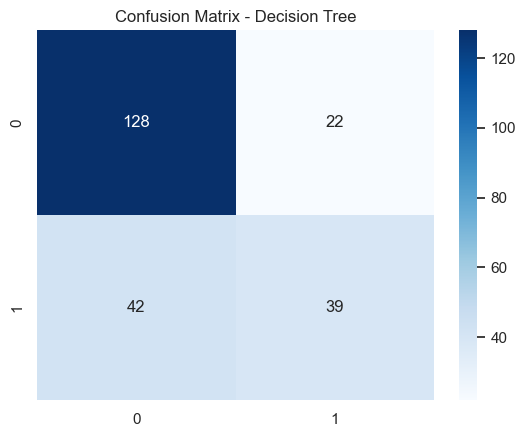


--- AdaBoost ---
Accuracy: 0.7489177489177489
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       150
           1       0.72      0.47      0.57        81

    accuracy                           0.75       231
   macro avg       0.74      0.68      0.70       231
weighted avg       0.74      0.75      0.73       231



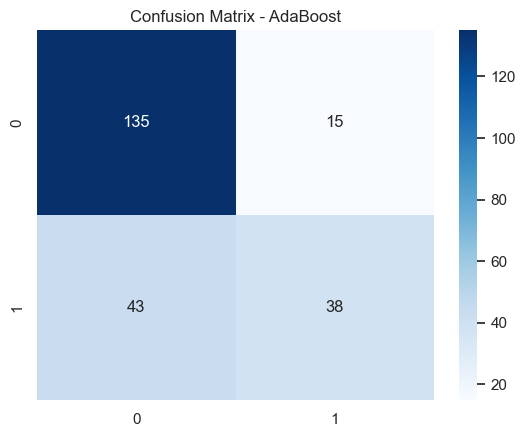


--- XGBoost ---
Accuracy: 0.7316017316017316
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       150
           1       0.64      0.54      0.59        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231



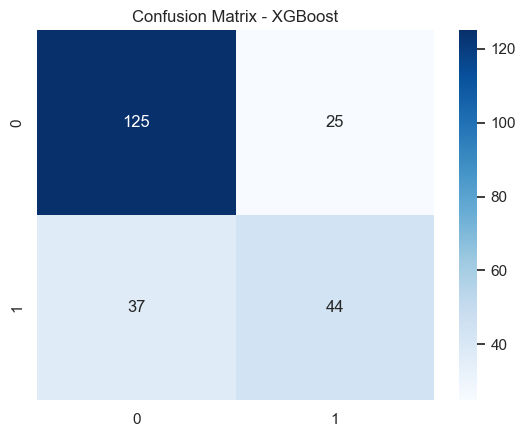

In [15]:
models = {'Decision Tree': dt_pred, 'AdaBoost': ada_pred, 'XGBoost': xgb_pred}

for name, pred in models.items():
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

---
### Conclusion
The performance comparison shows that boosting models outperform the standalone Decision Tree. AdaBoost achieved the highest accuracy (0.7489) and best AUC (0.8367), indicating strong classification ability for diabetes prediction. XGBoost performed competitively with a higher recall and F1-score than Decision Tree, proving better generalization. Overall, AdaBoost demonstrated the best balance between accuracy and discrimination power, making it the most effective model for this dataset.

---